# Problem Statement - Airbnb Hotel booking analysis

The hosiptality industry has undergone a significant transformation will the rise of online platforms faciliating short-term lodging and tourism. Leading the revolution is Airbnb Inc. a poineering American company that has reshaped travel accommodation through its innovative online marketplace. Established 2008 in San Francisco,california,Airbnb operates on a commission based model, facilitating transactions between hosts and guests without owning properties listed on its platform.

This research analysis delves into the New york City Airbnb dataset to extract meaningful insights. Through rigirous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discening factors influencing listing availability, pricing startegies, and overall customer satifaction. the research contributes to a deeper understanding of Airbnb's operations in one of the most dynamic urban environments. tese insights hold significance for stakeholders and exhausiasts seeking to navigate the evolving landscape of short-term accommodation.

# Questions

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data



1.   What are the different property types in the dataset?
2.   Which neighborhood group has the highest humber of testings?
3.   which neighborhoods group has the highest average prices of Airbnb listings?
4.   is there a relationship between the construction year of property and price?
5.   Who are the top 10 hosts by calculated host lisitng count?
6.   Are hosts with verified denities more likely to receive positive reviews?
7.   Is there a correlation between the price of a listing and its service fee?
8.   What is the average review rate number(e.g.starts) for listings, and does it vary based on the neighbourhood group and room type?
9.   Are hosts witha higher calculated host listings count more likely to maintain higher availability throughout the year?












# DATA WRANGLING

Data wragling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handing missing values, removing duplicates, ad transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# ACCESS THE DATA

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


# Problems Identified within the Data

*   541 duplicated Records where found in the Data.
*   Insufficient information were recorded for the house_rules and License columns.
*   Dollar signs and commas recorded along with the values for price and srvice fee.
*   The currency for price and service fee were not added to the columns titles.
*   Missing values in some records.
*   Columns like the price,service fee, id, host id, last review. Construction year are assigned wrong datatypes.
*   In the neighbourhood group column the spelling of 'Brookyln' was misspelt.
*   Some outliers were identified in the availability 365 column.                                                                     
# CLEAN THE DATA

# Steps to be Taken for Data Cleaning

*  Drop duplicated records.
*  Drop house_rules and license columns with insufficient data.
*  Remove all dollar signs in the price and service fee columns.
*  Remove all commas from the price and service fee columns.
*  Rename the price and service fee columns to include a dollar signs.
*  Drop all records with missing values.
*  Change all mismatched data types to the appropriate once.
*  Correct the Spelling of 'brookln' to 'Brooklyn'.
*  Get rid of outliers in the 'availability 365' column data.







In [ ]:
# 1. Drop duplicated records
df.drop_duplicates(inplace=True)

# 2. Drop house_rules and license columns with insufficient data
# This step is no longer needed as the columns were dropped in a previous run.
# df.drop(['house_rules','license'], axis=1, inplace=True)

# 3. Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$','', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$','', regex=False)

# 4. Remove all commas from the price and service fee columns.
df['price'] = df['price'].str.replace(',','', regex=False)
df['service fee'] = df['service fee'].str.replace(',','', regex=False)

# 5. Rename the price and service fee columns to include a dollar signs.
df.rename(columns = {
    'price':'price_$',
    'service fee':'service_fee_$'
} , inplace=True)

# 6. Drop all records with missing values.
df.dropna(inplace=True)

# 7. Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype('int64')
df['instant_bookable'] = df['instant_bookable'].astype(bool)
df['minimum nights'] = df['minimum nights'].astype(int)
df['number of reviews'] = df['number of reviews'].astype(int)
df['review rate number'] = df['review rate number'].astype(int)
df['calculated host listings count'] = df['calculated host listings count'].astype(int)
df['availability 365'] = df['availability 365'].astype(int)


# 8. Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

# 9. Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 365].index)

In [ ]:
df.duplicated().value_counts()

,count
False,81635


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81635 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81635 non-null  object        
 1   NAME                            81635 non-null  object        
 2   host id                         81635 non-null  object        
 3   host_identity_verified          81635 non-null  object        
 4   host name                       81635 non-null  object        
 5   neighbourhood group             81635 non-null  object        
 6   neighbourhood                   81635 non-null  object        
 7   lat                             81635 non-null  float64       
 8   long                            81635 non-null  float64       
 9   country                         81635 non-null  object        
 10  country code                    81635 non-null  object        
 11  instan

# EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationship between variables. Through techniques such as summary statistics, data visualization, and correlation analysis. EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

**Summary Statistics**

In [ ]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81635.000000,81635.000000,81635.000000,81443.000000,81413.000000,81635.000000,81635.000000,81635,81635.000000,81635.000000,81635.000000,81635.000000
mean,40.727261,-73.948262,2012.491480,626.746227,125.316178,7.449440,31.976334,2019-06-21 23:05:57.155631872,1.389208,3.286544,7.124505,135.038844
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687630,-73.982070,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721270,-73.953580,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762485,-73.930460,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056382,0.050622,5.760668,331.766290,66.350398,28.384755,51.611969,NaN,1.759669,1.278688,29.868488,128.489020


What are the different property types in the Dataset?

In [ ]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,43128
Private room,36774
Shared room,1623
Hotel room,110


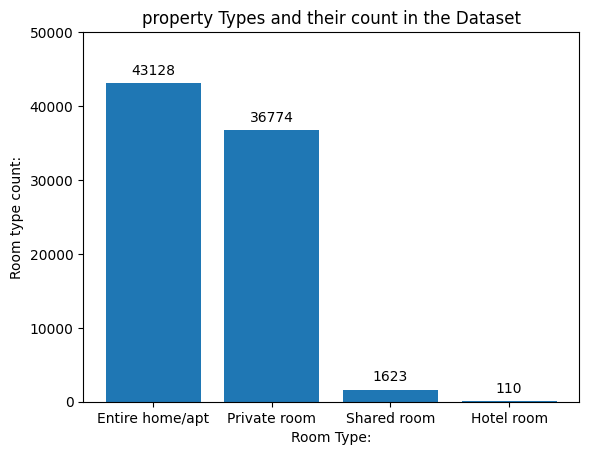

In [ ]:
room_type_bar = plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"],padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type:');
plt.ylabel('Room type count:');
plt.title('property Types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprises

*   Entire home/apt
*   Private room
*   Shared room
*   Hotel room

Notably, the barchart illustrates that Entire home/apo dominates the dataset with 43,128 occurances followed by private room with 36,774 occurances. Shared room and Hotel room trial behind with 1,623 and 110 occurances. respectively.

# Which neighborhood group has the highest number of listings?

In [ ]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33862
Manhattan,33708
Queens,11005
Bronx,2250
Staten Island,810


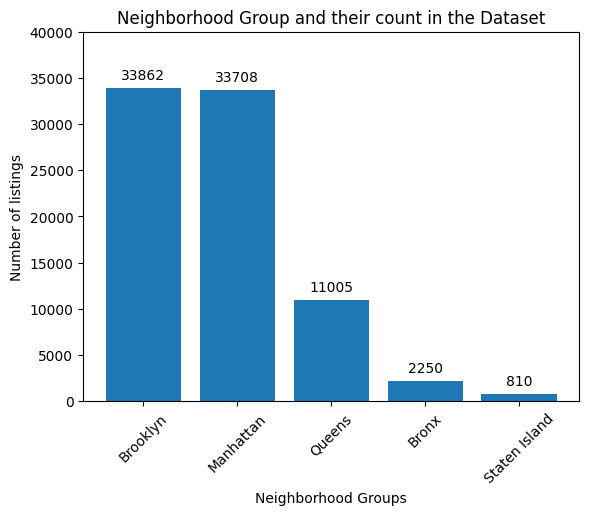

In [ ]:
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"],padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of listings');
plt.xticks(rotation = 45);
plt.title('Neighborhood Group and their count in the Dataset');

The dataset contains five different neighbourhood groups, namely Brooklyn, Manhattan, Queens, Bronx and Staten Island. According to the barchart, Brookyln has the highest number of listings with 33862, followed closely by Manhattan with 33708.

# Which neighborhoods group have the highest average prices for Airbnb listings?

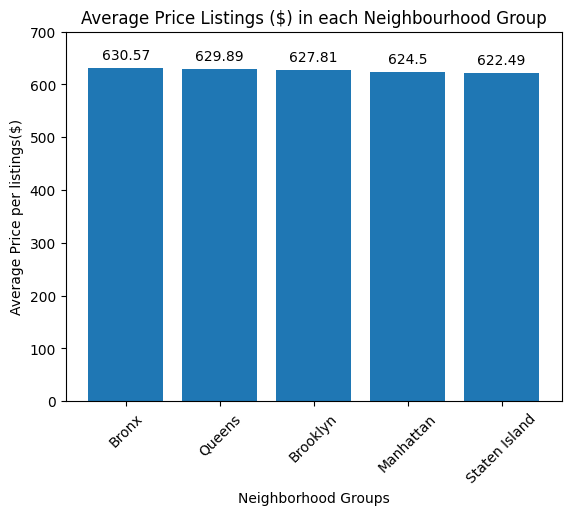

In [ ]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2),label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per listings($)');
plt.xticks(rotation = 45);
plt.title('Average Price Listings ($) in each Neighbourhood Group');

Among the five identified neighborhood groups in the dataset. Bronx the highest average listing price at 630.57 USD, closelt trailed by the Queens 629.89 USD. Conversly Staten Island records the lowest average listing price at 622.49.

# Is there a relationship between the construction year of property and price?

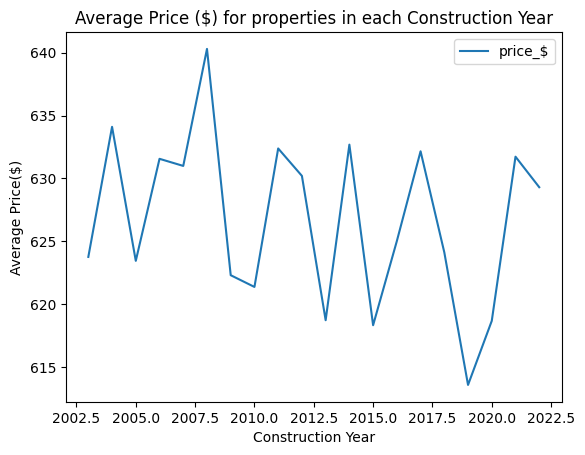

In [ ]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price ($) for properties in each Construction Year');

The line plot deplicating the construction year of properties versus average price per property reveals a notiecable downward trend in prices as the construction year progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progress.

# Who are the top 10 Hosts by calculated host listing Count?

From the numerous hosts in the dataset, we will see the 10 hosts with the highest calculated host count.

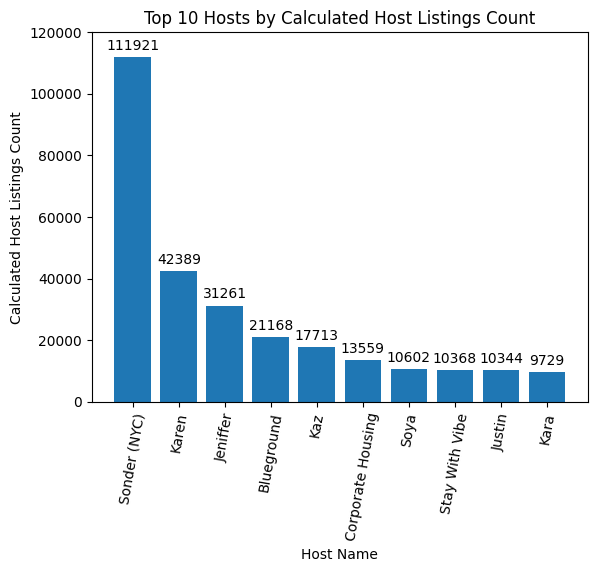

In [ ]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"], label_type = 'edge', padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
aplt.title('Top 10 Hosts by Calculated Host Listings Count');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder(NY) notablly leading with 111921 listing subsequently. the other hosts following in descending order.

*   Karen at second position with 4389 hosts.
*   Jeniffer at third position with 31262 hosts.
*   Blueground at fourth position with 21168 hosts.
*   Kaz at fifth position  with 17713 hosts.
*   Corporate Housing at sixth position with 13559 hosts.
*   Soya at seventh position with 10602 hosts.
*   Stay with vibe at eight position with 10368 hosts.
*   Justin at ninth position with 10344 hosts
*   Finally Kara at tenth position 9729 hosts.




# Are hosts are verified identities more likely to receive positive reviews?

In [ ]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.289735
unconfirmed,3.283351


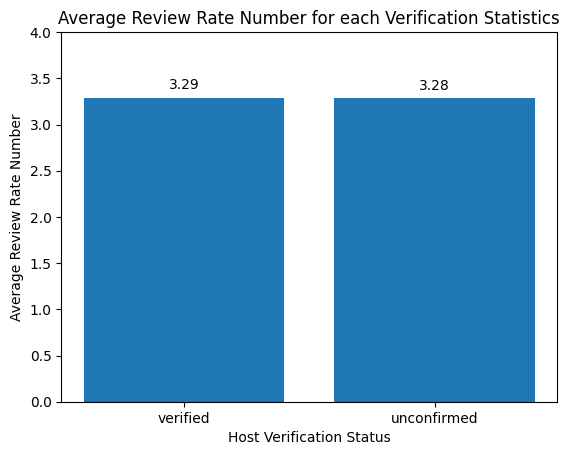

In [ ]:
review_bar = plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"],2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Verification Statistics');

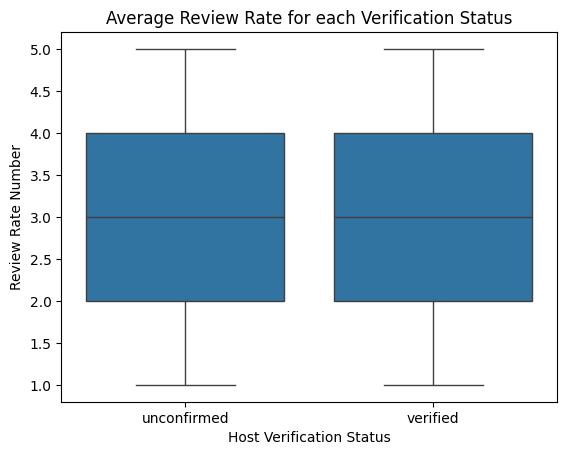

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

The average review rates for verified and unconfirmed hosts are 3.29 and 3.28 respectivelt, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggest that verified hosts are not necessarily more likely to receive positive reviews compared to unfonfirmed hosts.

# Is there a correlation between the price of a listing and its service fee?

In [ ]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909005366617)

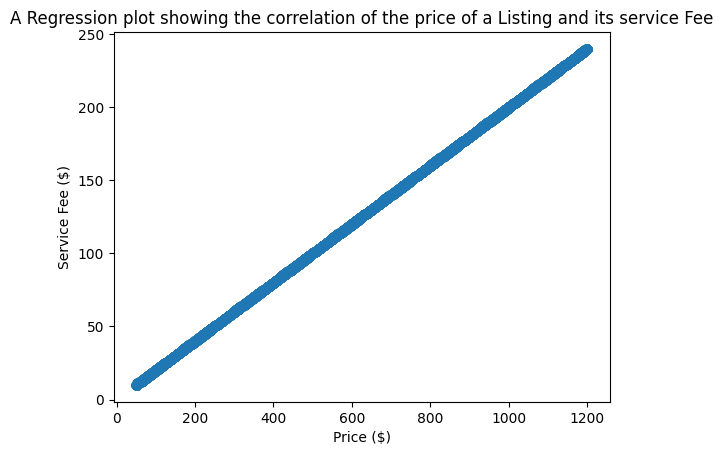

In [ ]:
sns.regplot(data = df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression plot showing the correlation of the price of a Listing and its service Fee');

The Pearson correlation coefficient between the price and service is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

# What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [ ]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.376157
                    Private room               3.322556
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.252236
                    Hotel room                 3.833333
                    Private room               3.283597
                    Shared room                3.326700
Manhattan           Entire home/apt            3.275310
                    Hotel room                 3.500000
                    Private room               3.293485
                    Shared room                3.260000
Queens              Entire home/apt            3.355581
                    Hotel room                 3.750000
                    Private room               3.318433
                    Shared room                3.326087
Staten Island       Entire home/apt            3.327711
                    Private room               3.487113
                    Shared room                3.714286

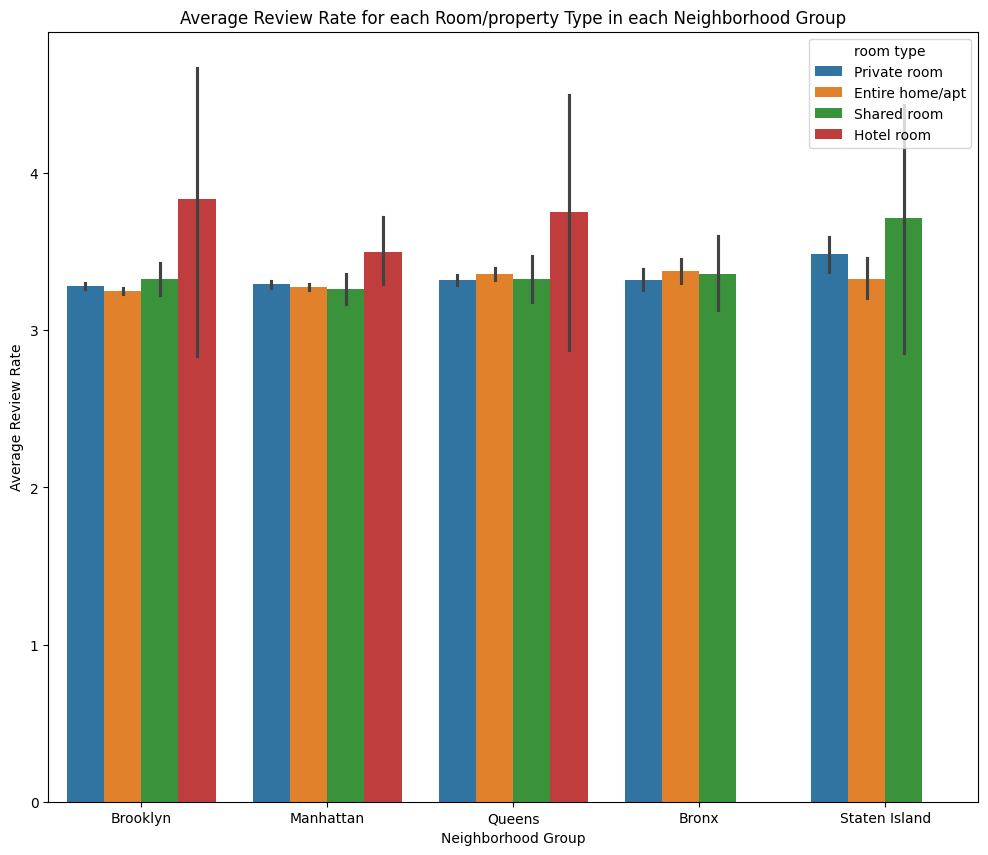

In [ ]:
plt.figure(figsize= [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/property Type in each Neighborhood Group');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan and Queens.

# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

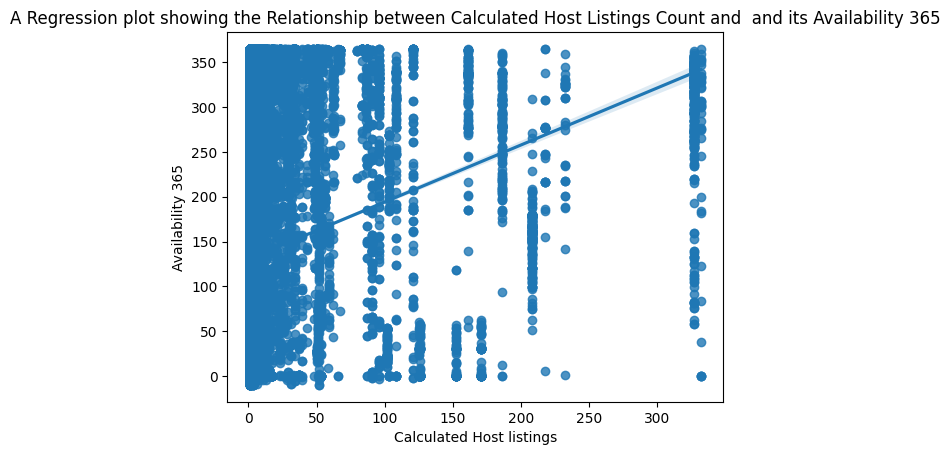

In [ ]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression plot showing the Relationship between Calculated Host Listings Count and  and its Availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14792824358366247)

The Persian correlation coefficient for the association between calculated host listings and availability 365 is 0.147. including a week positive correlation between the two variables.

# Conclusion

In conclusion, the project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term loading market. Through data wrangling, exploratory data analysis(EDA) and interpretation of summary statistics. We've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance In courts of Entire home/apt listings, the variability in listing courts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preference could inform targeted marketing startegies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behaviour, facilitating startegic decision-making for stakeholders in the short-term lodging industry.

